In [7]:
%load_ext autoreload
%autoreload 2

import sys
import os
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import CustomModule as cm

df = cm.LoadHousingData(['price', 'bedrooms','sqft_living','grade','sqft_lot'], clean=True)

/Users/danielvalenzuela/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
df['df'].columns

Index([            'price',              'date',          'bedrooms',
               'bathrooms',       'sqft_living',             'grade',
                'sqft_lot',          'yr_built', 'sqft_per_occupant',
           'space_x_grade',                   4,                   5,
                         6,                   7,                   8,
                         9,                  10,                  11,
                        12,                  13,             'urban',
                'suburban'],
      dtype='object')

In [23]:
df.shape

(21597, 17)

In [ ]:
df.date = pd.to_datetime(df.date, format='%m/%d/%Y')

The data is collected from sales of homes between May 2014 and May 2015. The home that sold at the lowest price of \\$78,000 dollars had 2 bedrooms, 1 bath, 780 square feet of living space, was built on a lot of 16,344 square feet, and had a grade of 5.

The home that sold at the highest price of $7.7 million had 6 beds, 8 baths, 12 thousand square feet of living space, built on a lot of 27.6 thousand square feet and had a grade of 13.

The homes in this dataset were also built between 1900 and 2015 according to the dataset, 87 and 38, respectively. However, given that one could realistically expect some homes to be built before 1900 and sold in 2015, it is possible for that this dataset has a "maximum" year when it comes to `yr_built`.

For the purposes of this analysis, the variables of interest are `price`, `bedrooms`, `sqft_lot`, `sqft_living`, and `grade` with `price` as the target variable and the rest being features.

In [29]:
df.date.max()

Timestamp('2015-05-27 00:00:00')

In [30]:
df.date.min()

Timestamp('2014-05-02 00:00:00')

In [114]:
df[df.price == df.price.min()]

,price,date,bedrooms,bathrooms,sqft_living,grade,sqft_lot,yr_built
15279,78000.0,5/6/2014,2,1.0,780,5,16344,1942


In [115]:
df[df.price == df.price.max()]

,price,date,bedrooms,bathrooms,sqft_living,grade,sqft_lot,yr_built
7245,7700000.0,10/13/2014,6,8.0,12050,13,27600,1910


In [45]:
df[df.yr_built == df.yr_built.max()].count()

price                38
date                 38
bedrooms             38
bathrooms            38
sqft_living          38
sqft_lot             38
yr_built             38
sqft_per_occupant    38
4                    38
5                    38
6                    38
7                    38
8                    38
9                    38
10                   38
11                   38
12                   38
13                   38
dtype: int64

In [44]:
df[df.yr_built == df.yr_built.min()].count()

price                87
date                 87
bedrooms             87
bathrooms            87
sqft_living          87
sqft_lot             87
yr_built             87
sqft_per_occupant    87
4                    87
5                    87
6                    87
7                    87
8                    87
9                    87
10                   87
11                   87
12                   87
13                   87
dtype: int64

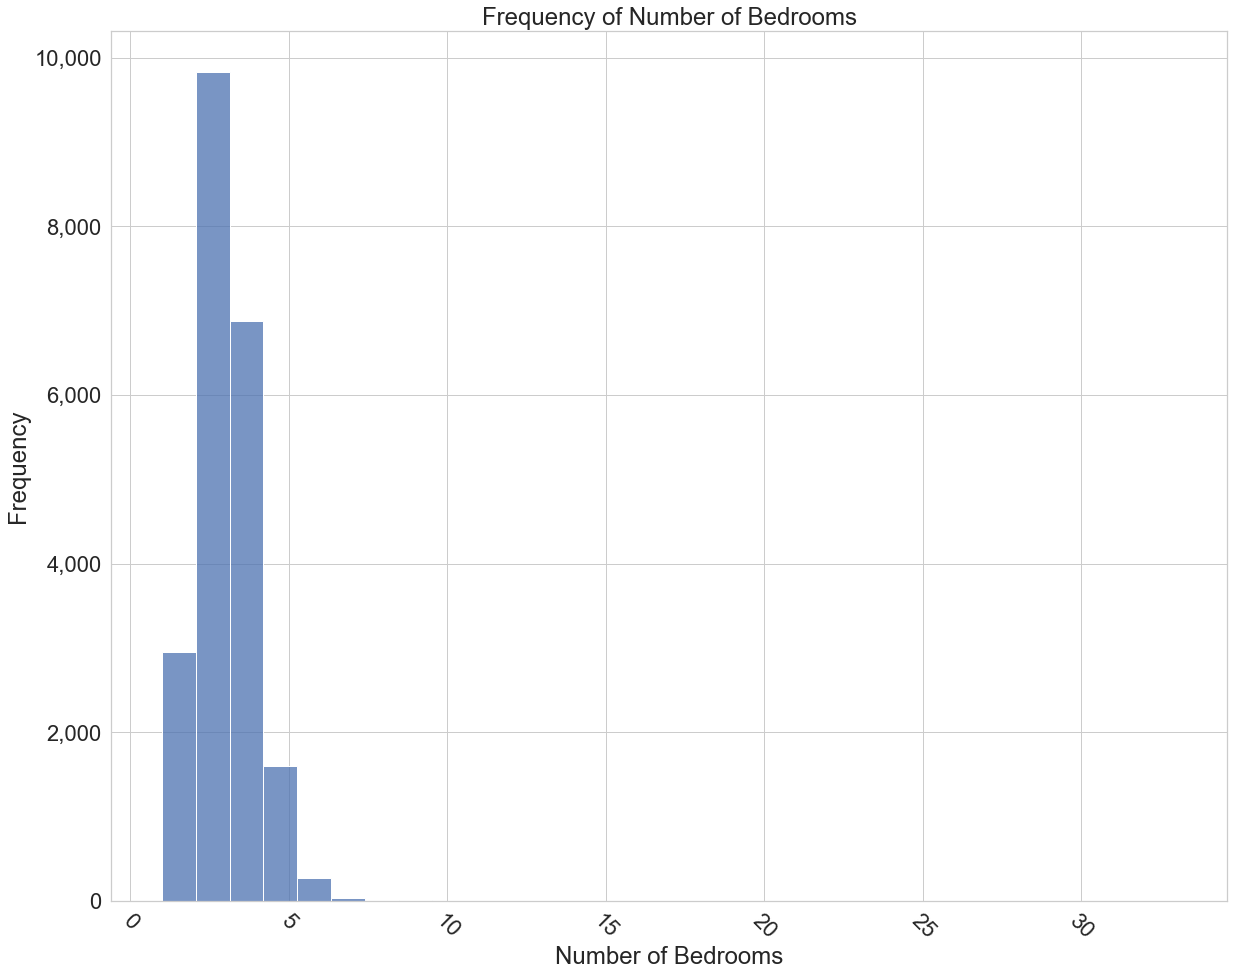

In [112]:
cm.PlotHist(df, 'bedrooms', 30)

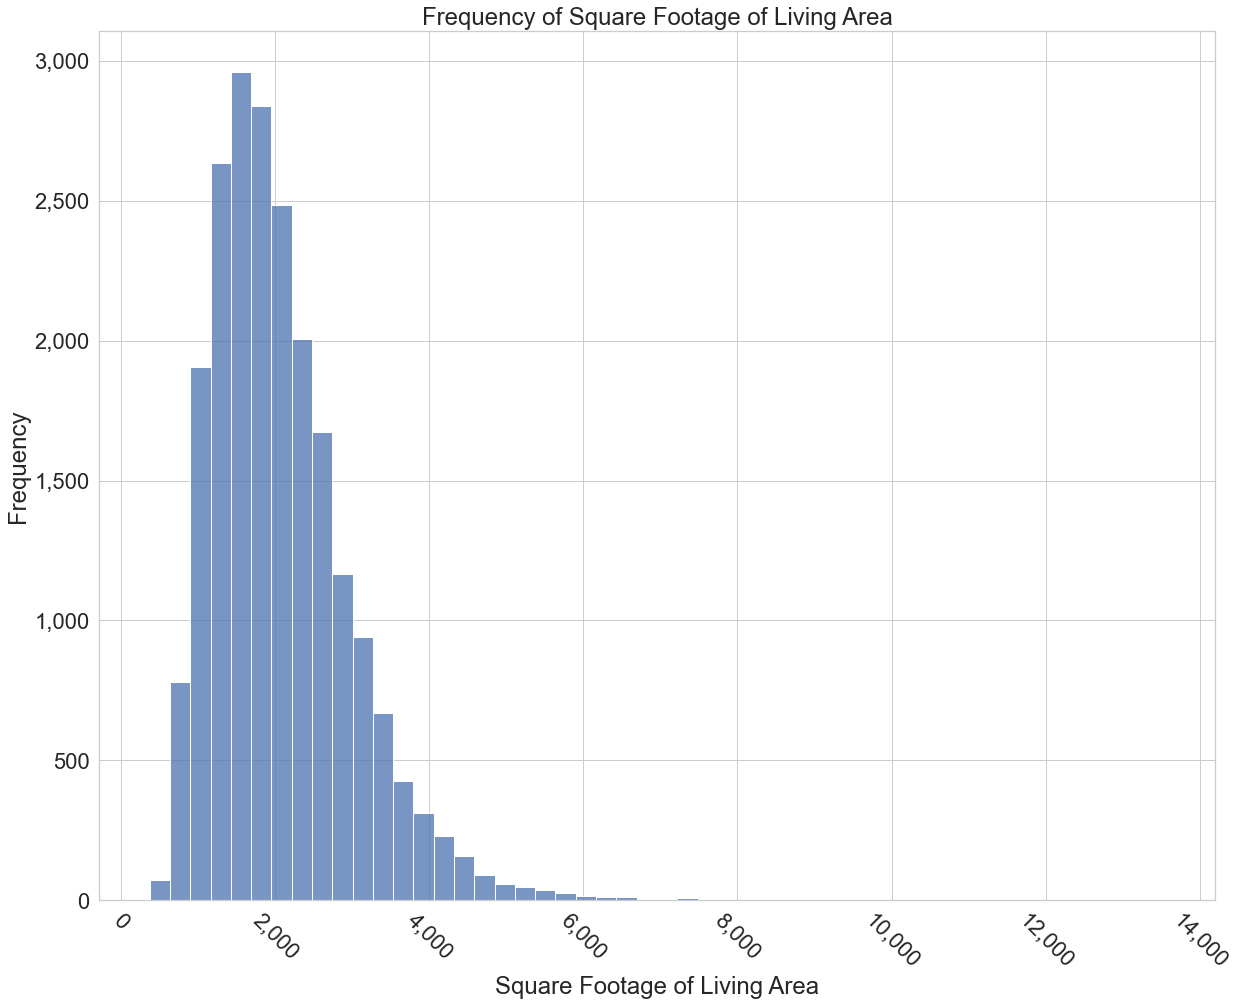

In [110]:
cm.PlotHist(df, 'sqft_living', 50)

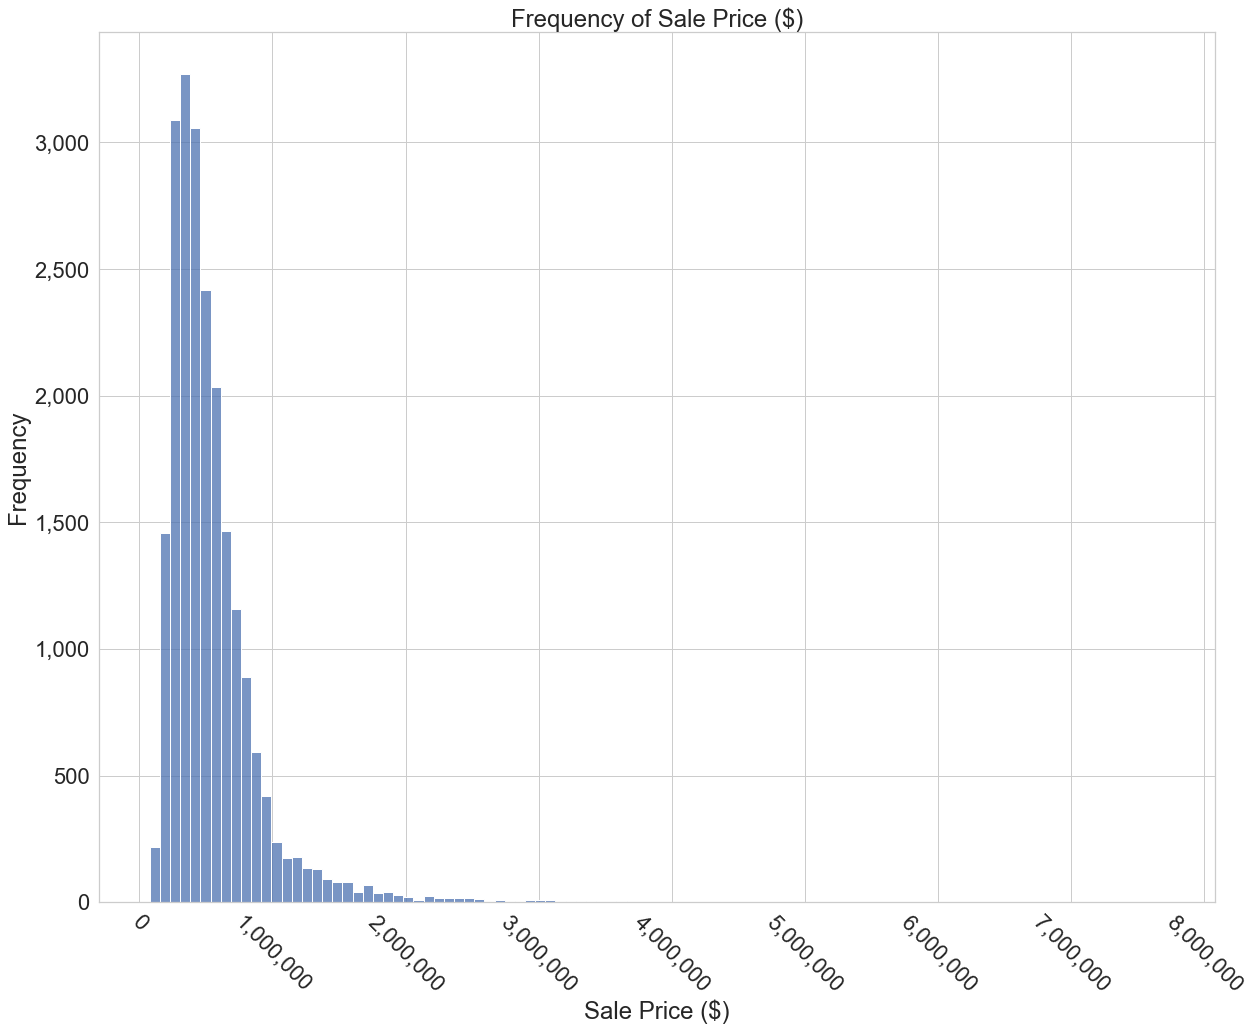

In [108]:
cm.PlotHist(df, 'price', 100)

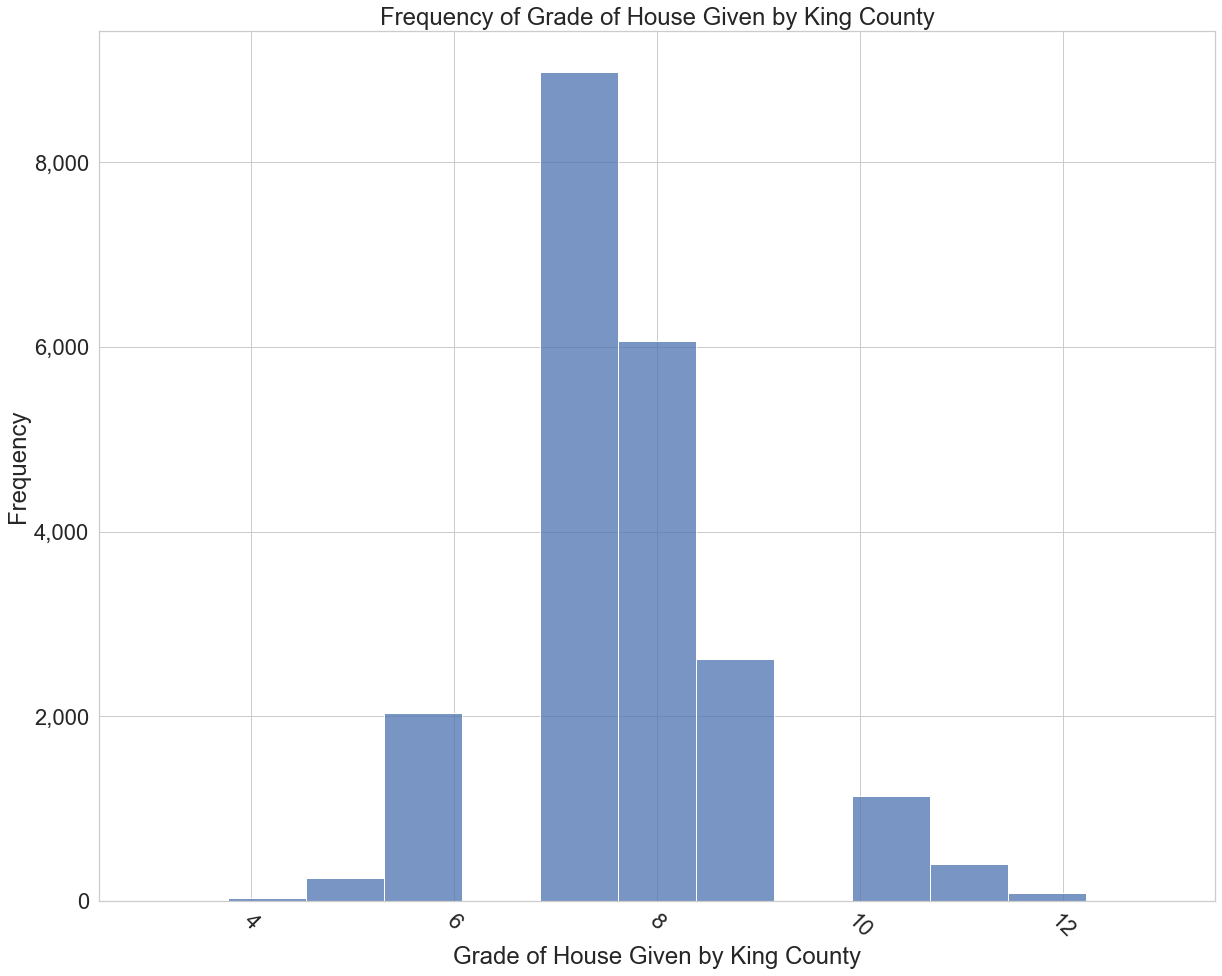

In [107]:
cm.PlotHist(df, 'grade', 13)

In [106]:
df.grade.describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

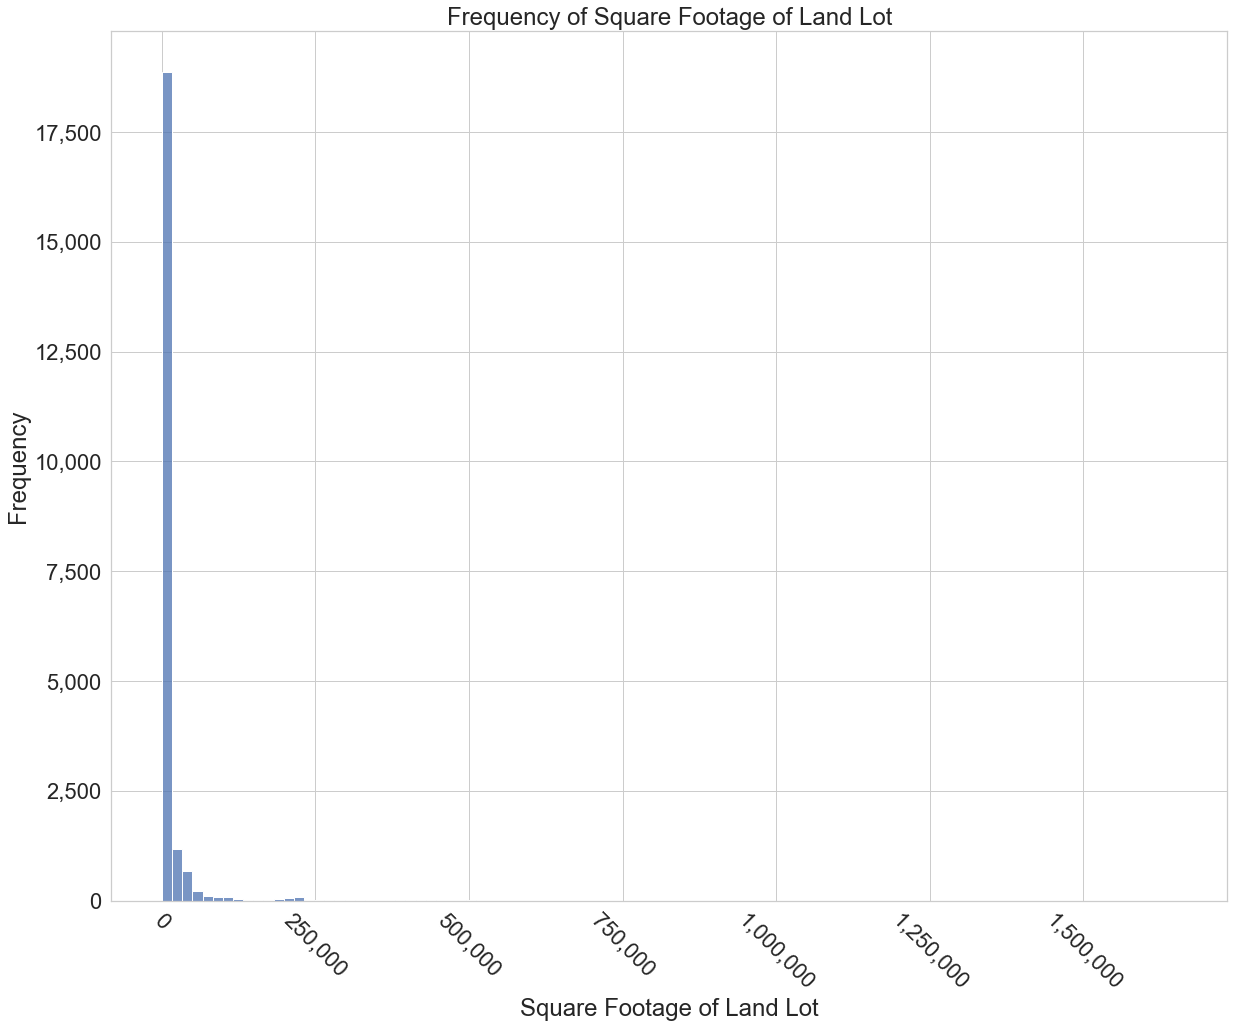

In [98]:
cm.PlotHist(df, 'sqft_lot', 100)

In [96]:
df.sqft_lot.describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

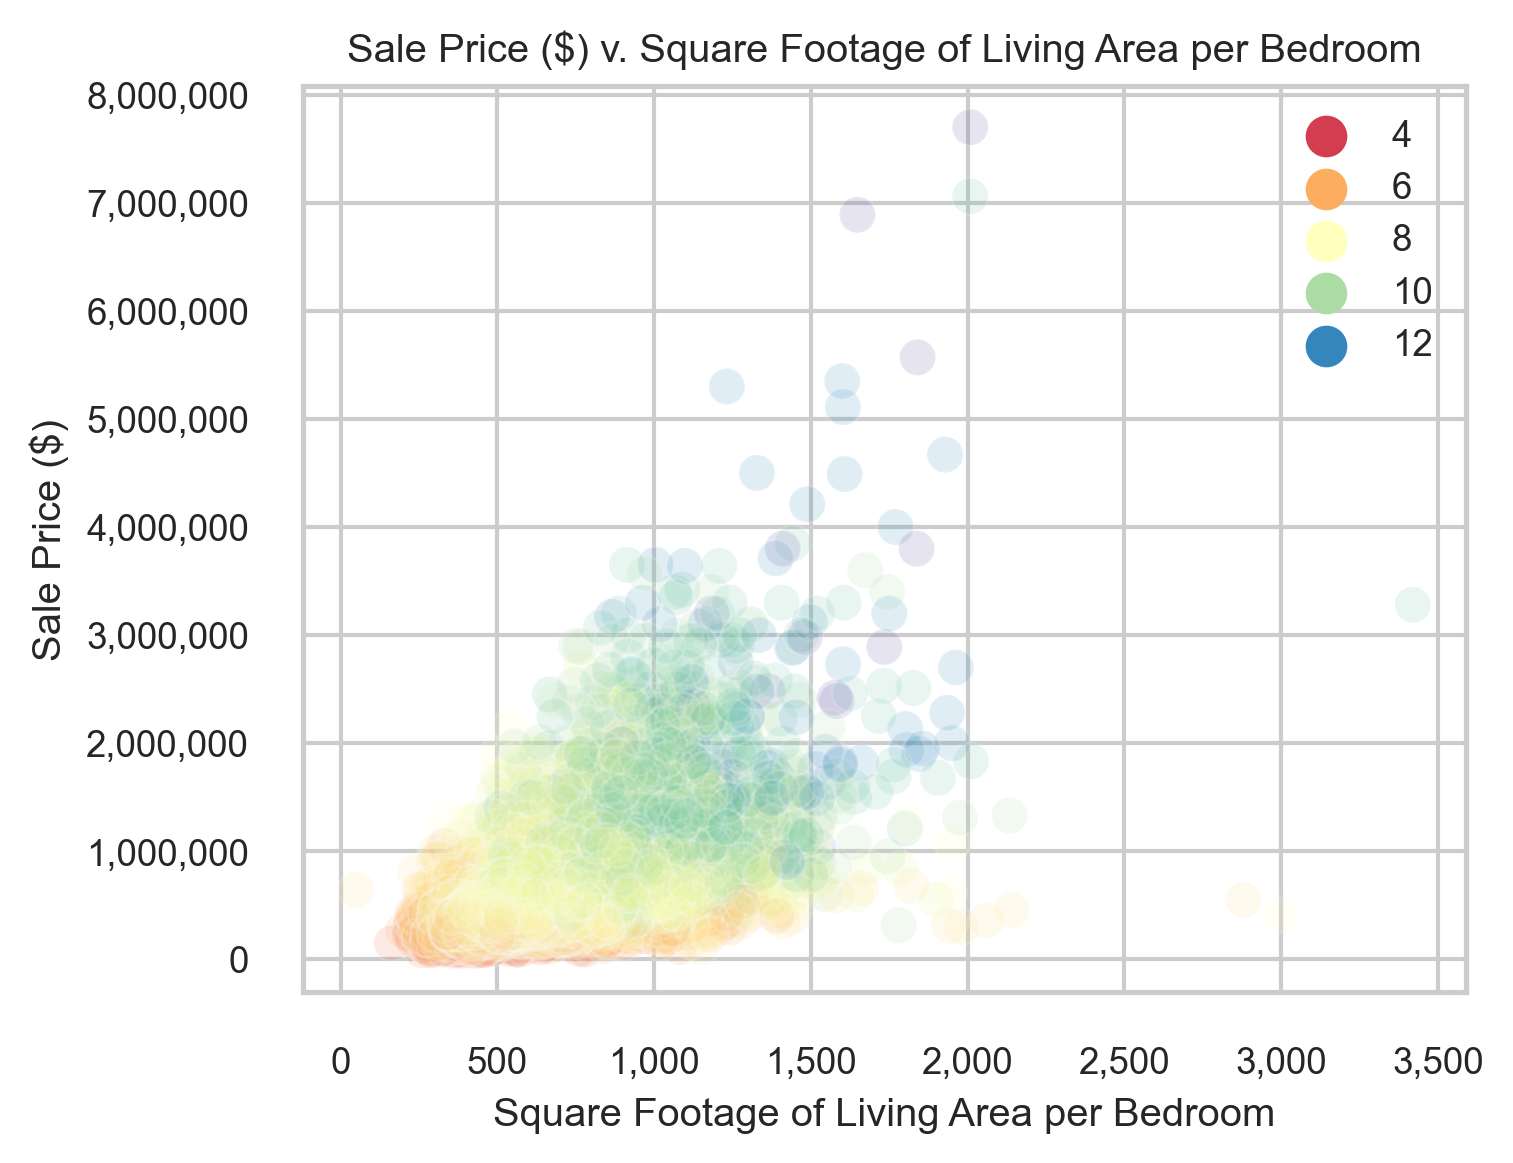

In [17]:
cm.PlotScatter(df['df'], 'sqft_per_occupant', 'price', hue='grade')

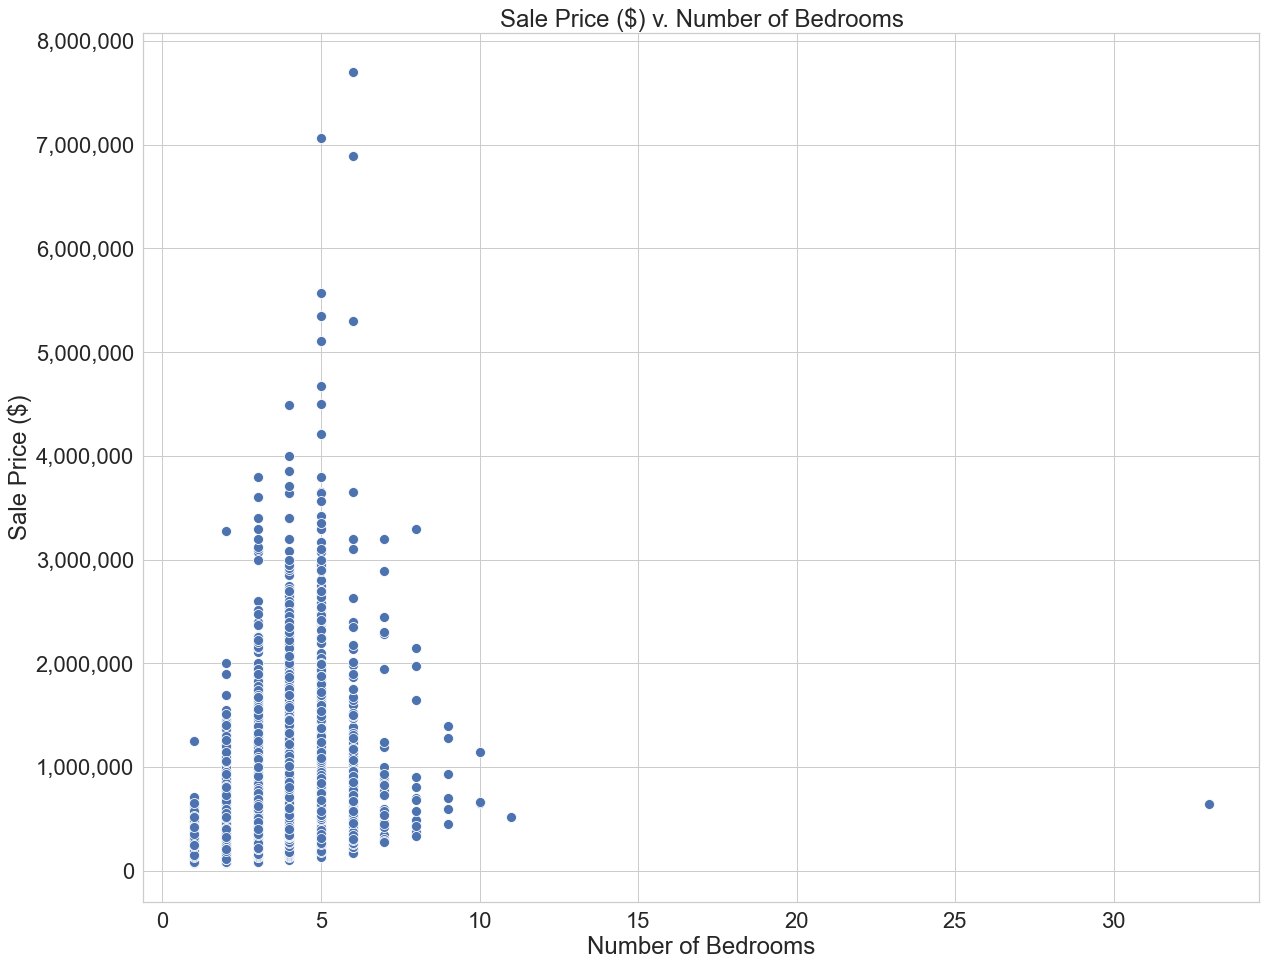

In [83]:
cm.PlotScatter(df,
              xvar='bedrooms',
              yvar='price')

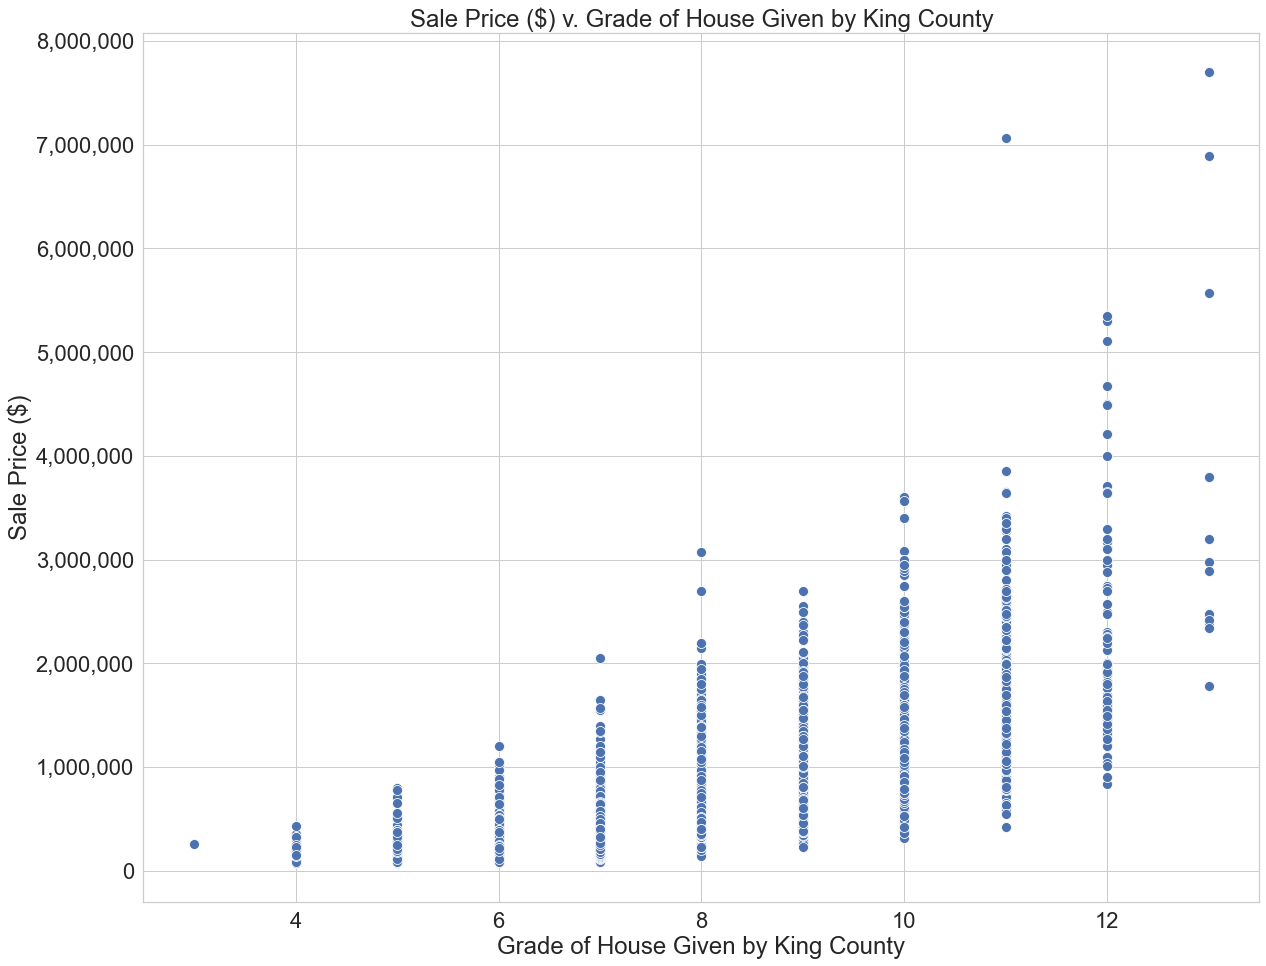

In [90]:
cm.PlotScatter(df,
              xvar='grade',
              yvar='price',
              )

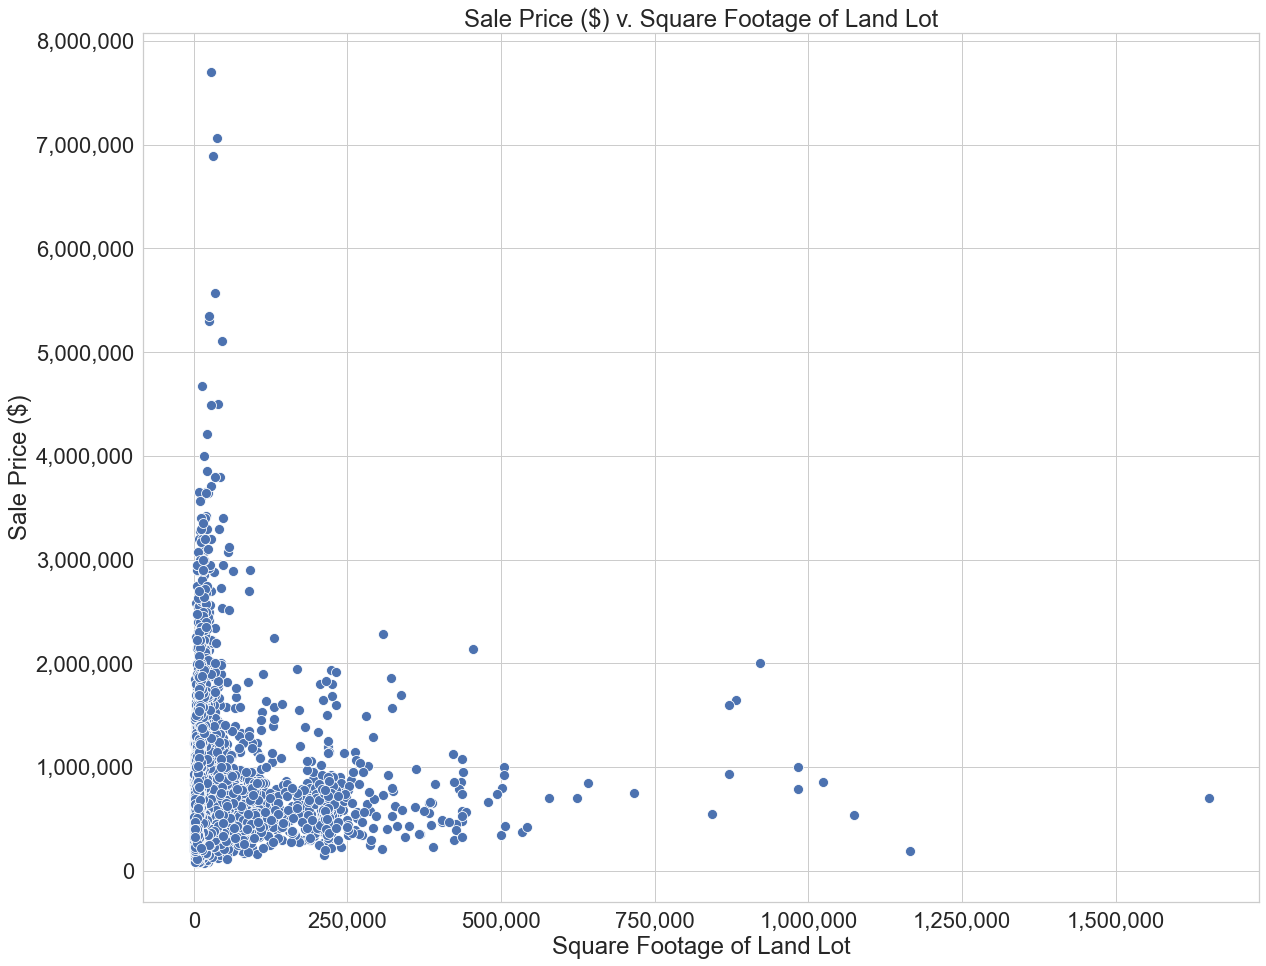

In [91]:
cm.PlotScatter(df,
              xvar='sqft_lot',
              yvar='price',
              )

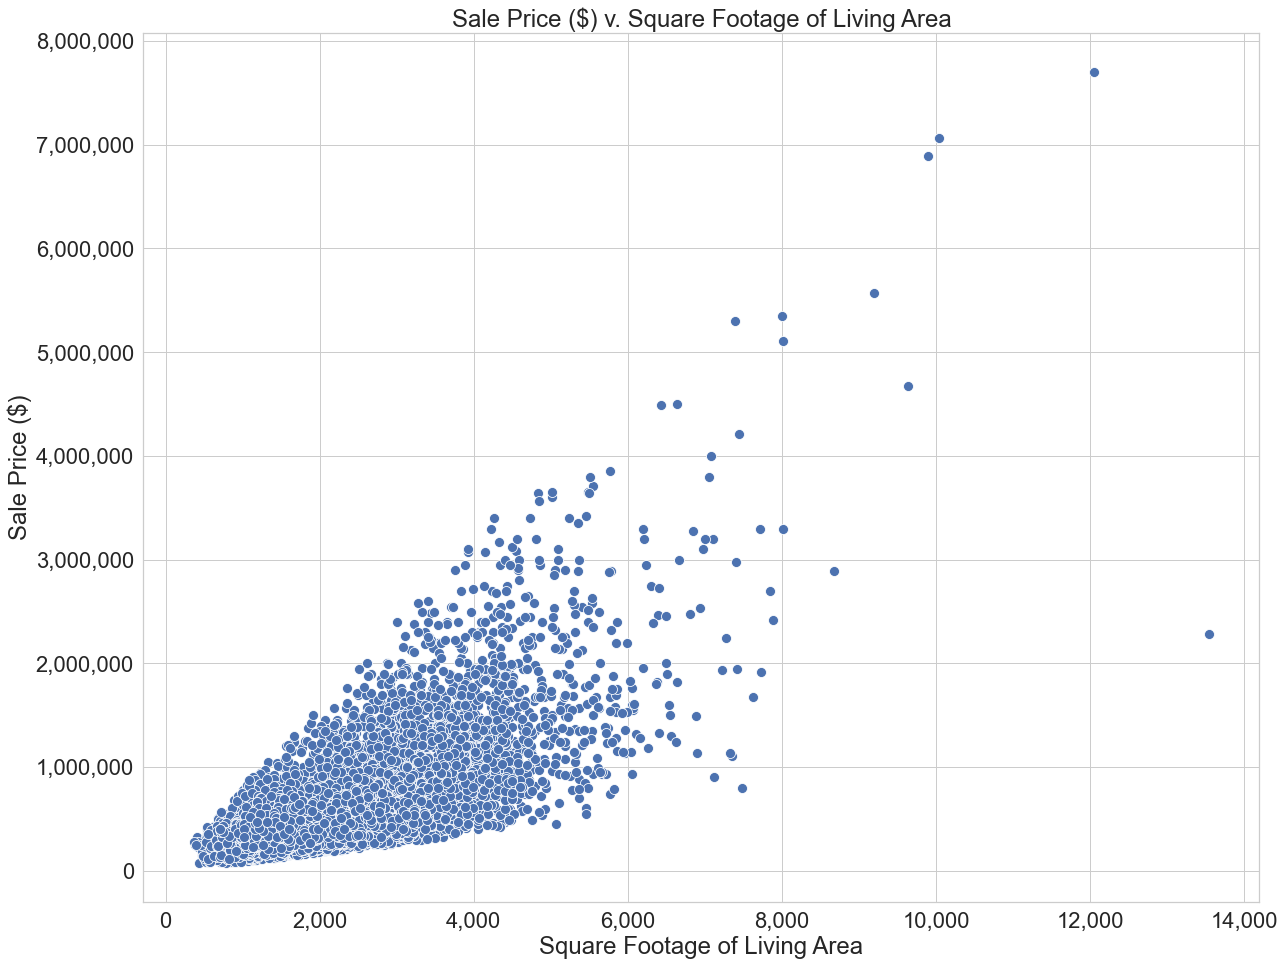

In [92]:
cm.PlotScatter(df,
              xvar='sqft_living',
              yvar='price',
              )

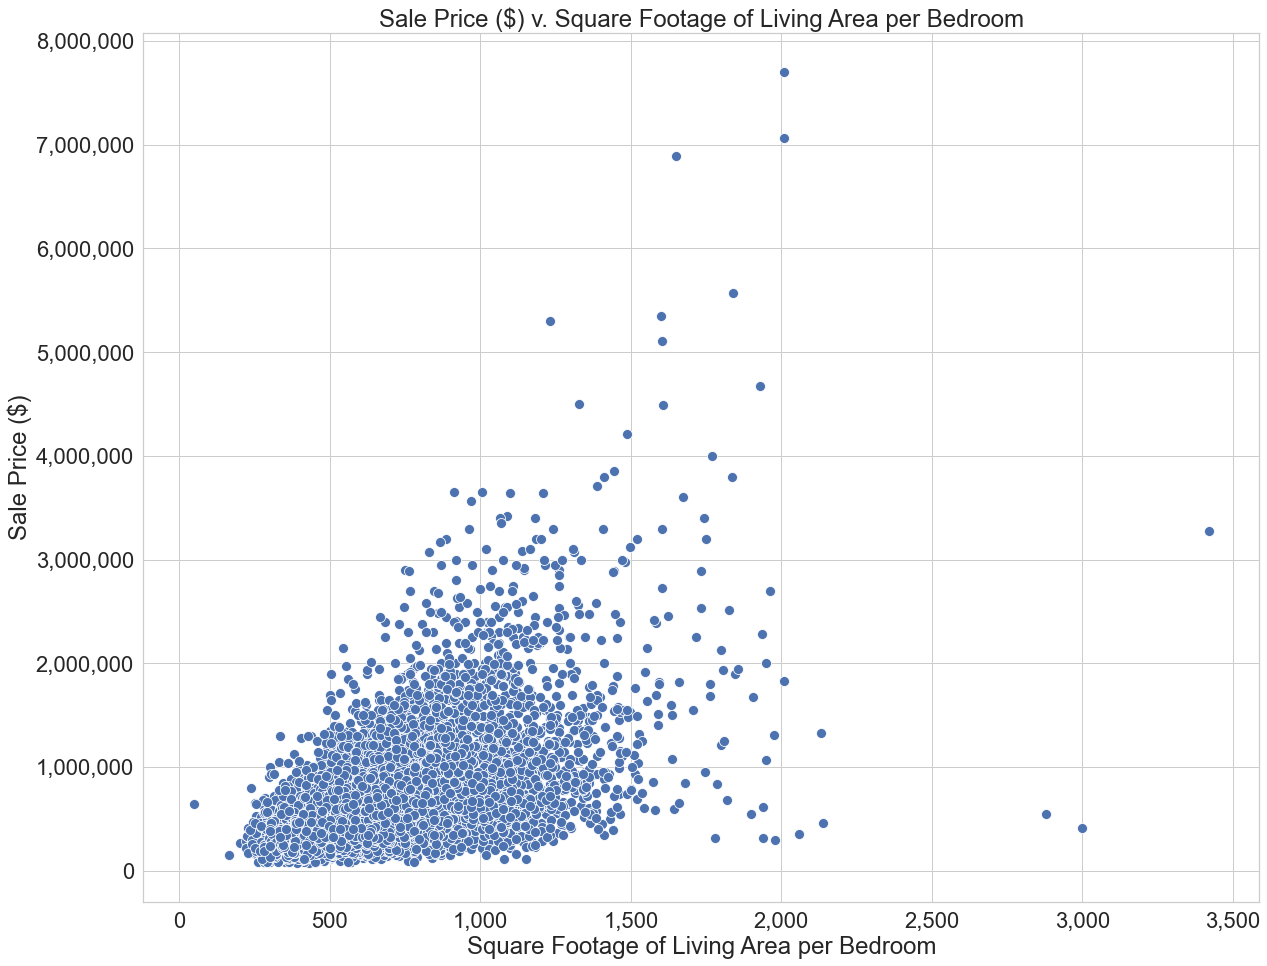

In [100]:
cm.PlotScatter(df,
               xvar='sqft_per_occupant',
               yvar='price'
              )

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              7830.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                        0.00
Time:                        10:23:16   Log-Likelihood:                     -2.3864e+05
No. Observations:               17277   AIC:                                  4.773e+05
Df Residuals:                   17263   BIC:                                  4.774e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms           7.451e+04   2278.146     32.705      0.000       7e+04     7.9e+04
sqft_per_occupant   511.8908     12.237     41.832      0.000     487.906     535.876
4                 -2.081e+05   4.96e+04     -4.194      0.000   -3.05e+05   -1.11e+05
5                 -2.244e+05   2.18e+04    -10.306      0.000   -2.67e+05   -1.82e+05
6                 -2.092e+05   1.46e+04    -14.347      0.000   -2.38e+05   -1.81e+05
7                 -1.864e+05    1.5e+04    -12.433      0.000   -2.16e+05   -1.57e+05
8                  -1.17e+05   1.63e+04     -7.162      0.000   -1.49e+05    -8.5e+04
9                  3.148e+04   1.82e+04      1.726      0.084   -4273.291    6.72e+04
10                 2.524e+05   2.05e+04     12.321      0.000    2.12e+05    2.93e+05
11                 6.007e+05   2.49e+04     24.142      0.000    5.52e+05    6.49e+05
12                 1.146e+06   3.71e+04     30.873      0.000    1.07e+06    1.22e+06
13                 2.618e+06   7.46e+04     35.076      0.000    2.47e+06    2.76e+06
urban              9.001e+04   8442.268     10.661      0.000    7.35e+04    1.07e+05
suburban           5.786e+04   8446.572      6.850      0.000    4.13e+04    7.44e+04
==============================================================================
Omnibus:                    12194.903   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           590165.003
Skew:                           2.849   Prob(JB):                         0.00
Kurtosis:                      31.060   Cond. No.                     2.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
df['train_set']

,price,date,bedrooms,bathrooms,sqft_living,grade,sqft_lot,yr_built,sqft_per_occupant,space_x_grade,...,6,7,8,9,10,11,12,13,urban,suburban
2744,405000.0,4/3/2015,4,2.50,2620,9,suburban,1987,655.000000,23580,...,0,0,0,1,0,0,0,0,0,1
8025,631750.0,8/18/2014,3,1.75,2360,7,urban,1940,786.666667,16520,...,0,1,0,0,0,0,0,0,1,0
13314,452500.0,10/9/2014,3,2.50,2240,7,urban,2002,746.666667,15680,...,0,1,0,0,0,0,0,0,1,0
8085,4670000.0,6/17/2014,5,6.75,9640,12,suburban,1983,1928.000000,115680,...,0,0,0,0,0,0,1,0,0,1
10303,709000.0,2/24/2015,3,2.75,2780,8,urban,1913,926.666667,22240,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,288000.0,7/31/2014,3,1.75,1660,7,suburban,1978,553.333333,11620,...,0,1,0,0,0,0,0,0,0,1
3046,525000.0,3/13/2015,3,2.50,2200,8,urban,2000,733.333333,17600,...,0,0,1,0,0,0,0,0,1,0
20463,290000.0,7/24/2014,2,1.50,770,7,urban,2006,385.000000,5390,...,0,1,0,0,0,0,0,0,1,0
18638,465000.0,3/27/2015,5,1.75,2000,7,suburban,1953,400.000000,14000,...,0,1,0,0,0,0,0,0,0,1
